# Exploratory Data Analysis Regarding Airbnb Ratings in Los Angeles - Group 22

Group Members:

- Ahmet Alperen Güngör - 28847

- Ali Cenker Yakışır - 28831

- Aydın Enes Bekar - 29546

- Batur Karakaya - 28881

- Cansın Narşahin - 29126

- İdil Yelçe - 28845

## Introduction

<font color="white">


- Airbnb is a widely used platform for providing accommodation services, and ratings are a crucial factor for users to choose their accommodation. Therefore, it might be beneficial for both hosts and guests to find out how these ratings are formed. Our aim is to investigate which factors, if any, have direct influence over overall ratings of users’ accommodation experience.

- In order to do so, we aim to examine factors such as neighborhood, amenities, price etc. to determine if there is a causation between these factors. In the first step, we will clean our data to dispose of corrupted values and places with low numbers of given ratings. In the aftermath, we will examine the correlations between these factors and the rating of accommodation to conduct and test our hypothesis.
<br>

</font>

### Problem Definition

<font color="white">

- It varies from individual to individual what makes a great accommodation experience for them. Since most people choose their accommodation according to the ratings, the question of which factors increase the ratings is important. Some people may look for higher ratings, but their personal preferences for certain features may not always be reflected in the rating of a particular accommodation. So, they usually look for that feature’s quality in the comments section and lose lots of time. Therefore, in this context, our project aims to assist individuals in finding accommodations that align with their specific preferences in a more efficient manner.
<br>

</font>

### Utilized Datasets

<font color="white">

-  The datasets that we use in our project are taken from the following link http://insideairbnb.com/get-the-data/ under Los Angeles section, namely listings.csv.

-  In the main dataset, each row consists of the general information of the accommodation such as amenities, number of rooms and beds, rating of accommodation and so on (See Cell 1.1).

- Since our point of interest concerns a certain region. In its original form, our dataset included 45815 rows and 75 columns. Since our dataset contains incomplete rows and columns that are irrelevant to our goal, those rows and columns were filtered not just for easing further computations, but also for displaying more readable and more accurate values (See Cells 1.2, 1.3).

- Additionally, since we aim to investigate the change in ratings, we have filtered the rows that had null value in their "review_scores_rating" column which had 10579 null values in total. After filtering both the rows and the columns, their number appeared to be 35236 and 21 respectively (See Cell 1.4-1.8).

- The data types that the columns included were float, string and integer values (See Cell 2.1). Furthermore, ratings of accommodations and their counts were plotted in Cell 2.2.
<br>

</font>

## Data Exploration

<font color="white">

- We will be clearing the data and remove the features that are irrelevant for our proejct. Some features are needed to be derived from some other columns we cannot use in given format. They will be refactored in a way that can be used for analysis.
<br>

</font>

Connect and load data from related path.

In [ ]:
# Cell 0.1

from google.colab import drive
drive.mount("./drive")

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
# Cell 0.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os.path import join


Examine the starting data. There are lots of columns like urls that are irrelevant for our work.

In [ ]:
# Cell 1.1

fname = 'listings.csv'
path_prefix = 'drive/MyDrive/'
df = pd.read_csv(join(path_prefix, fname))
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,183319.0,https://www.airbnb.com/rooms/183319,2.022090e+13,9/10/2022,previous scrape,Panoramic Ocean View Venice Beach,Craftsmen style penthouse with ocean view from...,About as close to the beach as you can live in...,https://a0.muscache.com/pictures/1170205/e2596...,867995,...,5.00,5.00,5.00,NaN,f,2,2,0,0,0.02
1,51307.0,https://www.airbnb.com/rooms/51307,2.022090e+13,9/10/2022,city scrape,Spanish Bungalow Guest House LA CA. 30 plus ni...,PRIVATE GUEST HOUSE<br /><br /><b>The space</b...,"Local LA Community , shops and restaurants in...",https://a0.muscache.com/pictures/294658/ac8d6e...,235568,...,4.85,4.95,4.76,NaN,f,2,2,0,0,0.98
2,184314.0,https://www.airbnb.com/rooms/184314,2.022090e+13,9/10/2022,previous scrape,Boho Chic Flat..Steps to Beach!,"Bright, airy, quiet 1 bdr located just steps f...",You are in one of the beach locations in Los A...,https://a0.muscache.com/pictures/0bc2f8b7-9378...,884031,...,4.93,4.89,4.85,NaN,t,1,1,0,0,0.22


In [ ]:
# Cell 1.2

num_rows, num_cols = df.shape
print("Initially, there are", num_rows ,"rows and", num_cols, "columns\n")

Initially, there are 45815 rows and 75 columns



We are listing the columns that are certainly not going to be used.

In [ ]:
# Cell 1.3

# The columns that we decided not to include in our project

to_del = ["review_scores_cleanliness", "review_scores_accuracy", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "host_neighbourhood", "accommodates", "reviews_per_month", 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count',
 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms', 'minimum_nights',
 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'instant_bookable',
 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms','neighbourhood']



Drop the given columns and report the new shape:

In [ ]:
# Cell 1.4

df.drop(to_del, axis=1, inplace=True)
num_rows, num_cols = df.shape
print("After cleaning unusefull columns, there are", num_rows ,"rows and", num_cols, "columns\n")

After cleaning unusefull columns, there are 45815 rows and 15 columns



In [ ]:
# Cell 1.5

# Sample of the dataset after filtering columns

df.head(3)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating
0,183319.0,within a day,100%,100%,f,Venice,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Bed linens"", ""Heating"", ""Dishes and silverwa...",$152.00,3,5.00
1,51307.0,NaN,NaN,NaN,f,Atwater Village,Entire bungalow,Entire home/apt,1 bath,1.0,1.0,"[""Air conditioning"", ""Bed linens"", ""Carbon mon...",$75.00,138,4.64
2,184314.0,NaN,NaN,NaN,f,Venice,Entire rental unit,Entire home/apt,1 bath,1.0,1.0,"[""Hangers"", ""Dryer"", ""Smoke alarm"", ""Kitchen"",...",$125.00,30,4.88


Number of null elements in each column prior to filtering rows:

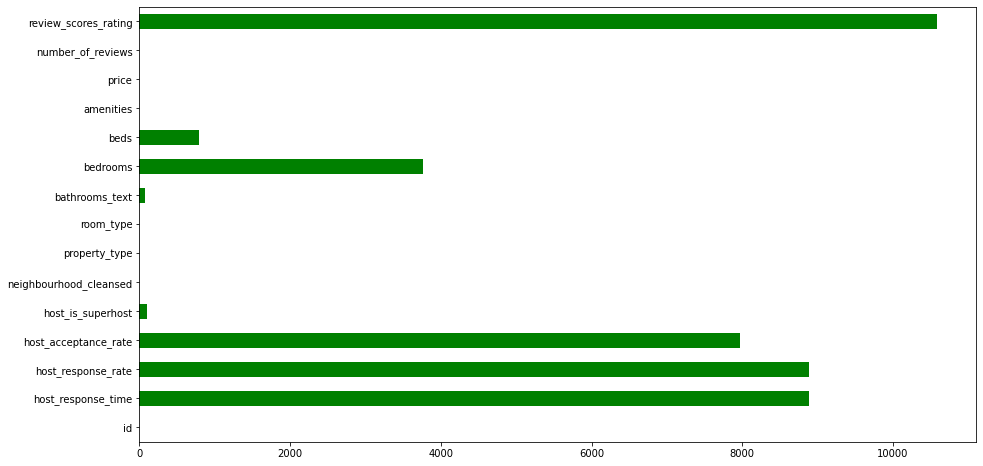

In [ ]:
# Cell 1.6

# Changing the size of the figure
plt.figure(figsize=(15,8))

# Count the number of null values in each column
null_counts = df.isnull().sum()

# Plot the null count for each column
null_counts.plot(kind='barh',color='green')

# Show the plot
plt.show()


Discard the rows with null ratings since it is our main parameter, and report the remained null values:

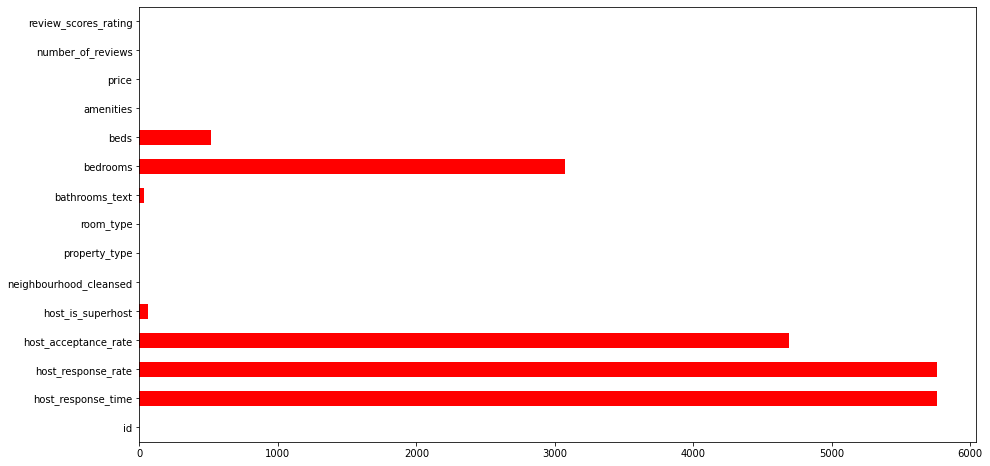

In [ ]:
# Cell 1.7

# Since we are going to use ratings as our main parameter, we have discarded the rows which had null values in their "review_scores_rating" column.
df = df[(df['review_scores_rating'].notnull())]

# Changing the size of the figure
plt.figure(figsize=(15,8))

# The null values remained in each column after filtering with respect to ratings are as follows:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Plot the null count for each column
null_counts.plot(kind='barh',color='red')



# Show the plot
plt.show()

Report the new shape and types of columns.

In [ ]:
# Cell 1.8

# After discarding null rating the number of rows and columns appeared to be as follows:
num_rows, num_cols = df.shape
print("\nAfter cleaning null ratings, there are", num_rows ,"rows and", num_cols, "columns\n")


After cleaning null ratings, there are 35236 rows and 15 columns



In [ ]:
# Cell 2.1

# The datatypes of the columns are as follows:
df.dtypes

id                        float64
host_response_time         object
host_response_rate         object
host_acceptance_rate       object
host_is_superhost          object
neighbourhood_cleansed     object
property_type              object
room_type                  object
bathrooms_text             object
bedrooms                  float64
beds                      float64
amenities                  object
price                      object
number_of_reviews           int64
review_scores_rating      float64
dtype: object

We will take a look at the distribution of ratings.

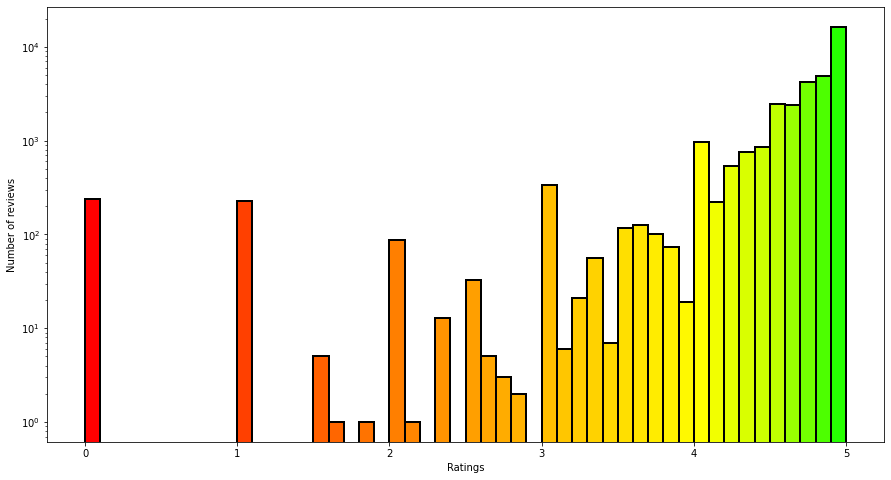

In [ ]:
# Cell 2.2

# Changing the size of the figure
plt.figure(figsize=(15,8))

# Bar chart of number of ratings vs ratings
reviews_hist,bins,patches= plt.hist(df['review_scores_rating'],bins=50, log = True)

# Set the x-axis label
plt.xlabel('Ratings')

# Set the y-axis label
plt.ylabel('Number of reviews')


# Setting the color of the each bar.
r = 1.0
g = 0.0
b = 0.0
color = (r,g,b)
for bar in patches:
  x, y = bar.get_xy()
  w = bar.get_width()
  bar.set_color(color)
  bar.set_edgecolor('black')
  bar.set_linewidth(2)
  if x < 4.0:
    g = g + 0.02499
  else:
    g = 1
    if x < 4.5:
      r = r - 0.05
    else:
      r = r - 0.14999
  color = (r,g,b)



# Show the plot
plt.show()

Now we need to refactor same of the features and generate some new ones:


* Prices are in a string format that contains "$" sign and "," as a seperator for thousands. We want them as doubles.




In [ ]:
# Cell 2.3

def currency_check (row):
  c = row['price']
  if c.find('$') == 0:
    return float(c.replace(',','')[1:])
  else:
    # We checked if there are any prices that are not in dollars
    print("Currency not dolar")

df['price'] = df.apply (lambda row: currency_check(row), axis=1)
df['price'].head()

0    152.0
1     75.0
2    125.0
3    189.0
4    115.0
Name: price, dtype: float64



*   We want to include some amenities to our examination. People enter the amenities themselves so there are lots of differently named amenities. Take a look at the amenities that are used more than 10,000 times.



In [ ]:
# Cell 2.4

dt = {}

for row in df.amenities:
  row = row[1:-1].split(',')
  for i in row:
    if i not in dt.keys():
      dt[i] = 1
    else:
      dt[i] += 1

cnt = 0
for key in dt.keys():
  if dt[key] > 10000:
    print(key)
    cnt += 1

print("\n")

# At the bottom, the amenities are sorted in decreasing order and printed.
dt_sorted = sorted(dt.items(), key=lambda x:x[1], reverse = True)
print(dt_sorted)
print("\n")

# The number of amenities that have count larger than 10000
print(cnt)

# After analyzing the amenities with high counts, we came up with 5 different amenities that might have more considerable impact than the other amenities. These amenities are:
# Wifi, Kitchen, TV, Air Conditioning, Parking


 "Heating"
 "Dishes and silverware"
 "Extra pillows and blankets"
 "Smoke alarm"
 "TV"
 "Hot water"
 "Cooking basics"
 "Coffee maker"
 "Hangers"
 "Stove"
 "Wifi"
 "Iron"
 "Oven"
 "Kitchen"
 "Long term stays allowed"
 "Microwave"
 "Free street parking"
 "Fire extinguisher"
 "Refrigerator"
 "Bathtub"
 "Bed linens"
 "Carbon monoxide alarm"
 "Essentials"
 "Dryer"
 "Private entrance"
 "Dishwasher"
 "Washer"
 "Free parking on premises"
 "First aid kit"
 "Shampoo"
 "Hair dryer"
 "Air conditioning"
 "Shower gel"
 "Dedicated workspace"
 "Cleaning products"
 "Freezer"
 "Dining table"
 "Security cameras on property"


[(' "Wifi"', 32397), (' "Essentials"', 31819), (' "Long term stays allowed"', 31543), (' "Smoke alarm"', 30832), (' "Carbon monoxide alarm"', 30227), (' "Kitchen"', 29863), (' "Hair dryer"', 28618), (' "Hot water"', 27353), (' "Iron"', 26840), (' "Hangers"', 25960), (' "Shampoo"', 25675), (' "Dishes and silverware"', 25497), (' "Heating"', 25115), (' "Refrigerator"', 24439), (' "Cof



*   We choose 5 of them which we are curious to see their relevancy with ratings.



In [ ]:
 # Cell 3.1

 # Wifi, Kitchen, TV, Air Conditioning, Parking

 # At this cell, we created 5 new columns for each of our parameter and checked each row whether they contain our amenities in their amenities list.
 # If they had the parameters, we appended "True" value in their respective columns, otherwise we put "False".

Wifi = []
TV = []
AirCondition = []
Parking = []
Kitchen = []
for row in df.amenities:

  row = row[1:-1].split(', ')

  if '"Wifi"' in row:
    Wifi.append(True)
  else:
    Wifi.append(False)

  if '"Air conditioning"' in row:
    AirCondition.append(True)
  else:
    AirCondition.append(False)

  if '"Kitchen"' in row:
    Kitchen.append(True)
  else:
    Kitchen.append(False)

  if '"TV"' in row:
    TV.append(True)
  else:
    TV.append(False)

  if '"Free parking on premises"' in row:
    Parking.append(True)
  else:
    if '"Free street parking"' in row:
      Parking.append(True)
    else:
      Parking.append(False)

df["wifiBool"] = Wifi
df["tvBool"] = TV
df["airConditioningBool"] = AirCondition
df["parkingBool"] = Parking
df["kitchenBool"] = Kitchen


df.head(5)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,wifiBool,tvBool,airConditioningBool,parkingBool,kitchenBool
0,183319.0,within a day,100%,100%,f,Venice,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Bed linens"", ""Heating"", ""Dishes and silverwa...",152.0,3,5.00,True,True,False,True,True
1,51307.0,NaN,NaN,NaN,f,Atwater Village,Entire bungalow,Entire home/apt,1 bath,1.0,1.0,"[""Air conditioning"", ""Bed linens"", ""Carbon mon...",75.0,138,4.64,False,True,True,True,True
2,184314.0,NaN,NaN,NaN,f,Venice,Entire rental unit,Entire home/apt,1 bath,1.0,1.0,"[""Hangers"", ""Dryer"", ""Smoke alarm"", ""Kitchen"",...",125.0,30,4.88,True,False,False,True,True
3,51498.0,within an hour,100%,88%,f,Mar Vista,Entire guesthouse,Entire home/apt,1 bath,NaN,1.0,"[""Toaster"", ""Cable TV"", ""Air conditioning"", ""B...",189.0,378,4.73,True,False,True,True,True
4,109.0,NaN,NaN,NaN,f,Culver City,Entire condo,Entire home/apt,2 baths,2.0,3.0,"[""Cable TV"", ""Air conditioning"", ""Carbon monox...",115.0,2,4.00,True,False,True,True,True


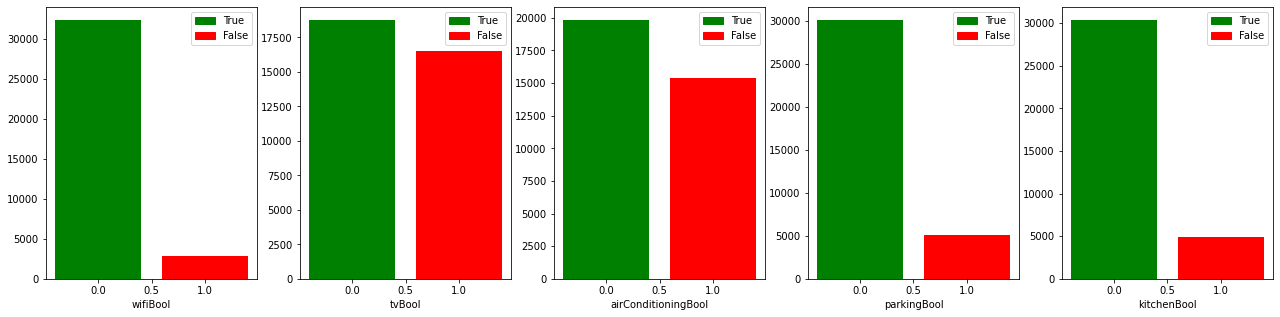

In [ ]:
# Get the value counts for each column
wifi_counts = df['wifiBool'].value_counts()
tv_counts = df['tvBool'].value_counts()
air_conditioning_counts = df['airConditioningBool'].value_counts()
parking_counts = df['parkingBool'].value_counts()
kitchen_counts = df['kitchenBool'].value_counts()

# Create the bar plots
fig, axs = plt.subplots(1, 5, figsize=(22, 5))
axs[0].bar([0, 1], wifi_counts.values, color=['green', 'red'])
axs[1].bar([0, 1], tv_counts.values, color=['green', 'red'])
axs[2].bar([0, 1], air_conditioning_counts.values, color=['green', 'red'])
axs[3].bar([0, 1], parking_counts.values, color=['green', 'red'])
axs[4].bar([0, 1], kitchen_counts.values, color=['green', 'red'])

# Set the labels and show the plot
axs[0].set_xlabel('wifiBool')
axs[1].set_xlabel('tvBool')
axs[2].set_xlabel('airConditioningBool')
axs[3].set_xlabel('parkingBool')
axs[4].set_xlabel('kitchenBool')

# Adding legend to graphs
colors = {'True':'green', 'False':'red'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
for i in range(5):
  axs[i].legend(handles, labels)

plt.show()



*   Number and the privacy situatuon of the bathrooms were given as one string, we seperated the number and the info of if the bathroom is shared to two columns.



In [ ]:
 # Cell 3.2

isBathShared = []
bathNumber = []
for row in range(df.shape[0]):
  bathText = df.iloc[row]["bathrooms_text"]
  bathInfo = str(bathText).split(" ")

  if "shared" in bathInfo:
    isBathShared.append(True)
  else:
    isBathShared.append(False)

  bathNumber.append(bathInfo[0])

df["isBathShared"] = isBathShared
df["bathNumber"] = bathNumber
df.drop("bathrooms_text", axis=1, inplace=True)

for row in range(10):
  print(df.iloc[row]["id"], df.iloc[row]["bathNumber"], df.iloc[row]["isBathShared"])

183319.0 1 False
51307.0 1 False
184314.0 1 False
51498.0 1 False
109.0 2 False
185536.0 1 True
2708.0 1 True
51546.0 1 False
185557.0 1 True
2732.0 1 False


We plotted the correlation levels of each row with each other. At first glance it seems to be there is no strong correlation between any feature and rating scores. We will investigate the relationships as we progress.

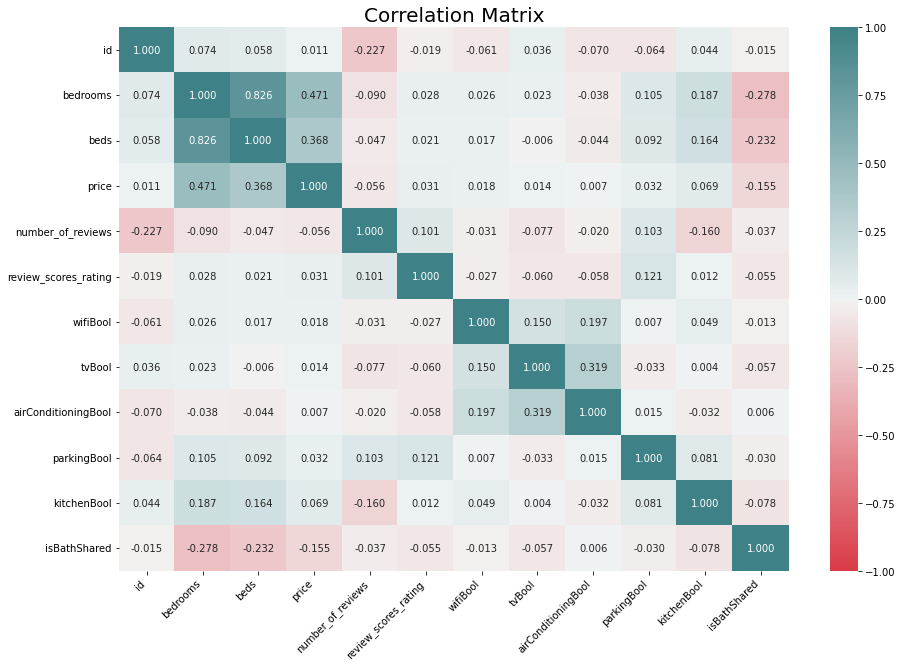

In [ ]:
 # Cell 4.1


# Set the figure size
plt.figure(figsize=(15, 10))

# Create a diverging color palette
palette = sns.diverging_palette(10, 200, n=256)

# Calculate the Pearson correlation of the DataFrame
corr = df.corr(method='pearson')

# Plot the heatmap
sns.heatmap(corr, annot=True, fmt=".3f", cmap=palette, vmin=-1, vmax=1)

# Rotate the x-axis tick labels
plt.xticks(rotation=45,horizontalalignment='right')

# Set the title
plt.title("Correlation Matrix", size=20)

# Show the plot
plt.show()

In [ ]:
from scipy.optimize.minpack import dtype
from sklearn.linear_model import LinearRegression

df['wifi'] = df['wifiBool'].astype(int)
df['tv'] = df['tvBool'].astype(int)
df['airConditioning'] = df['airConditioningBool'].astype(int)
df['parking'] = df['parkingBool'].astype(int)
df['kitchen'] = df['kitchenBool'].astype(int)

df['parking'] = df['parkingBool']


df['review_scores_rating'] = df['review_scores_rating'].replace(-np.inf, 0)

Xwifi = df[['wifi']]
Xtv = df[['tv']]
XairConditioning = df[['airConditioningBool']]
Xparking = df[['parking']]
Xkitchen = df[['kitchenBool']]
y = df['review_scores_rating']

modelwifi = LinearRegression()
modelwifi.fit(Xwifi, y)

modeltv = LinearRegression()
modeltv.fit(Xtv, y)

modelairConditioning = LinearRegression()
modelairConditioning.fit(XairConditioning, y)

modelparking = LinearRegression()
modelparking.fit(Xparking, y)

modelkitchen = LinearRegression()
modelkitchen.fit(Xkitchen, y)


print("Coefficient of existence of wifi:", modelwifi.coef_[0])
print("Intercept of existence of wifi:", modelwifi.intercept_)

print("Coefficient of existence of tv:", modeltv.coef_[0])
print("Intercept of existence of tv:", modeltv.intercept_)

print("Coefficient of existence of air conditioner:", modelairConditioning.coef_[0])
print("Intercept of existence of air conditioner:", modelairConditioning.intercept_)

print("Coefficient of existence of parking:", modelparking.coef_[0])
print("Intercept of existence of parking:", modelparking.intercept_)

print("Coefficient of existence of kitchen:", modelkitchen.coef_[0])
print("Intercept of existence of kitchen:", modelkitchen.intercept_)

Coefficient of existence of wifi: -0.06073086184135102
Intercept of existence of wifi: 4.7571190053285966
Coefficient of existence of tv: -0.07357158088964182
Intercept of existence of tv: 4.735641257995735
Coefficient of existence of air conditioner: -0.07147759144716291
Intercept of existence of air conditioner: 4.7414901909835
Coefficient of existence of parking: 0.21211524841165114
Intercept of existence of parking: 4.5198018053375195
Coefficient of existence of kitchen: 0.020738093140468008
Intercept of existence of kitchen: 4.683366885784716


In [ ]:
from scipy.stats import zscore
from scipy.stats import norm


wifi = df[df['wifi'] == 1]['review_scores_rating']
no_wifi = df[df['wifi'] == 0]['review_scores_rating']

parking = df[df['parking'] == 1]['review_scores_rating']
no_parking = df[df['parking'] == 0]['review_scores_rating']




wifi_mean = wifi.mean()
wifi_std = wifi.std()
no_wifi_mean = no_wifi.mean()
no_wifi_std = no_wifi.std()

parking_mean = parking.mean()
parking_std = parking.std()
no_parking_mean = no_parking.mean()
no_parking_std = no_parking.std()




z = (wifi_mean - no_wifi_mean) / np.sqrt(wifi_std*2 / len(wifi) + no_wifi_std*2 / len(no_wifi))
p_value = norm.cdf(-z)

zPark = (parking_mean - no_parking_mean) / np.sqrt(parking_std*2 / len(parking) + no_parking_std*2 / len(no_parking))
p_valuePark = norm.cdf(zPark)

## Conclusion

<font color="white">

- Since we aim to develop a model that would please both the guest and the host, up to the point that we have reached in developing our project and according to the data we have examined, we believe that the solution that we are going to come up with will be most highly to be applicable.  

- Regarding the advantages of our solution, considering the fact that we plan to find the most beneficial factors that could help both the guest and the host, the hosts may choose to adjust their accommodation services accordingly thus providing guests a more ameliorate experience and maximize their profit. Succedingly, users can rate the accommodation higher, so that the accommodation attracts more guests which could benefit both the host and the future guests.

- Coming to the drawbacks of our solution, it could be the case that the prices of the accommodations might be higher than the guest expects to be due to new appliances in the accommodation. It might also be the case that other extraordinary factors such as inflation and inconvenience arising in the city could lead the hosts not to adjust the accommodation.
<br>

</font>


## Future Work

<font color="white">

- In the following weeks, we plan to analyze our data in more detail and try varying hypothesis testing methods that could help us to draw a certain conclusion regarding our research topic and hypothesis. Similarly, we aim to investigate factors other than our parameters which might have influence on the ratings. In the meantime, we aim to develop a machine learning system that could help both users and hosts to provide a better accommodation service for the final of our project.
<br>

</font>

## Work Division

<font color="white">

In our project,

- Alperen is in charge of cleaning the data and examinig the later methods (for Hypothesis Testing, ML etc.) we can use.


- Batur is responsible for preparing the documentation, and extracting the most used amenities and adding new features for amenities which were chosen to examine.


- Cansın manages the visualization of the datasets and refactoring price column.


- Cenker is in control of preparing the documentation and took part in the visualization.


- Enes is taking care of cleaning of the dataset and seperating bathrooms_text to two new features to make it useful.



- İdil is mostly concerned with extracting the most used amenities and adding new features for amenities which were chosen to examine.


In addition, the tasks of each teammate are not necessarily fixed. Each member of the team aids one another when they have time. Furthermore, they gather or find methods, data, information that might contribute to the project.
<br>

</font>